# Azure cognitive services implementation 

In [1]:
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from msrest.authentication import CognitiveServicesCredentials

from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes

from azure.cognitiveservices.vision.face import FaceClient
from azure.cognitiveservices.vision.face.models import FaceAttributeType

#to use azure cognitive services you must first create the resource to get the key and endpoint

cog_key = 'my_cog_key'
cog_endpoint = 'my_cog_endpoint'

face_client = FaceClient(cog_endpoint, CognitiveServicesCredentials(cog_key))
computervision_client = ComputerVisionClient(cog_endpoint, CognitiveServicesCredentials(cog_key))


In [17]:
import pandas as pd
import numpy as np

def tunnista_elementit(kuvat):

    pic_results = []

    for image in kuvat:
    
        try:
            tags_result_remote = computervision_client.tag_image(image)
    
        except:
            continue
    
        for tag in tags_result_remote.tags:
            tag_dict = {
               'displayUrl': image, 
               'tag_names' :tag.name, 
               'tag_confidences': tag.confidence,
            
              }
            pic_results.append(tag_dict)
    
        if not tags_result_remote:
            tag_dict = {
                'displayUrl': os.path.basename(image), 
                'tag_names' : np.nan,
                'tag_confidences': np.nan
              }
            pic_results.append(tag_dict)

    df_tags = pd.DataFrame(pic_results)
    
    return df_tags

# Esimerkki: tunnista elementtejä seuraavassa kuvassa

In [18]:
kuvat  = ['https://pbs.twimg.com/media/FQZOiWyakAIwH93?format=jpg&name=medium']

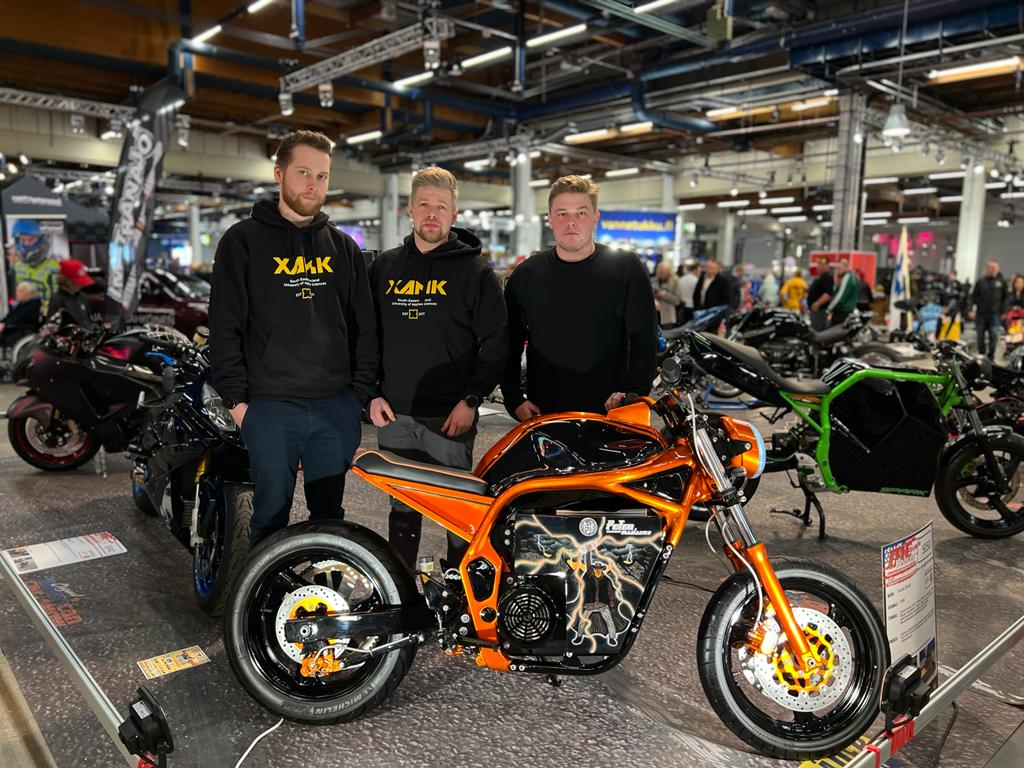

In [19]:
tunnista_elementit(kuvat)

,displayUrl,tag_names,tag_confidences
0,https://pbs.twimg.com/media/FQZOiWyakAIwH93?fo...,person,0.984591
1,https://pbs.twimg.com/media/FQZOiWyakAIwH93?fo...,tire,0.976095
2,https://pbs.twimg.com/media/FQZOiWyakAIwH93?fo...,wheel,0.968087
3,https://pbs.twimg.com/media/FQZOiWyakAIwH93?fo...,land vehicle,0.965455
4,https://pbs.twimg.com/media/FQZOiWyakAIwH93?fo...,vehicle,0.941730
5,https://pbs.twimg.com/media/FQZOiWyakAIwH93?fo...,auto part,0.923197
6,https://pbs.twimg.com/media/FQZOiWyakAIwH93?fo...,ceiling,0.914375
7,https://pbs.twimg.com/media/FQZOiWyakAIwH93?fo...,indoor,0.909019
8,https://pbs.twimg.com/media/FQZOiWyakAIwH93?fo...,bike,0.846300
9,https://pbs.twimg.com/media/FQZOiWyakAIwH93?fo...,standing,0.803310
